In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
train=pd.read_csv("train_v9rqX0R.csv")
test=pd.read_csv("test_AbJTz2l.csv")


In [100]:
trainc=train.copy()
testc=test.copy()

In [101]:
trainc.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [102]:
testc.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


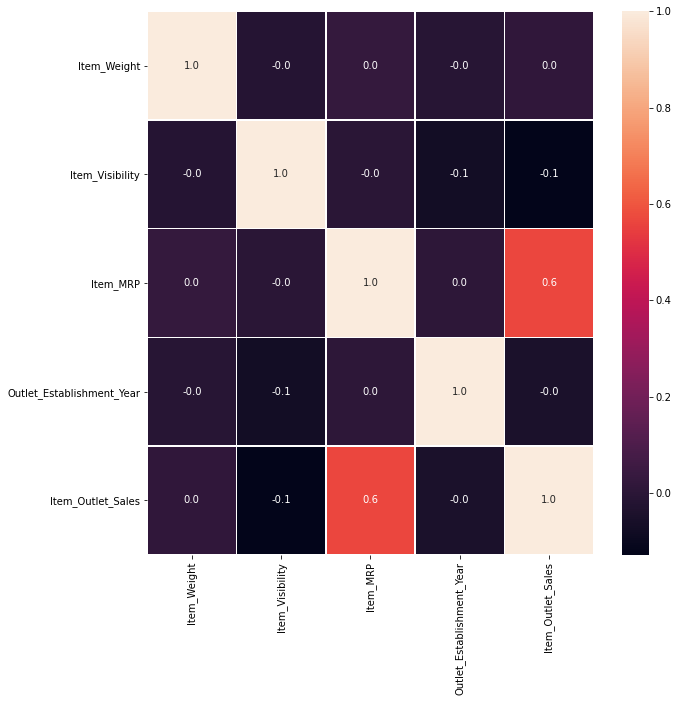

In [103]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(trainc.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

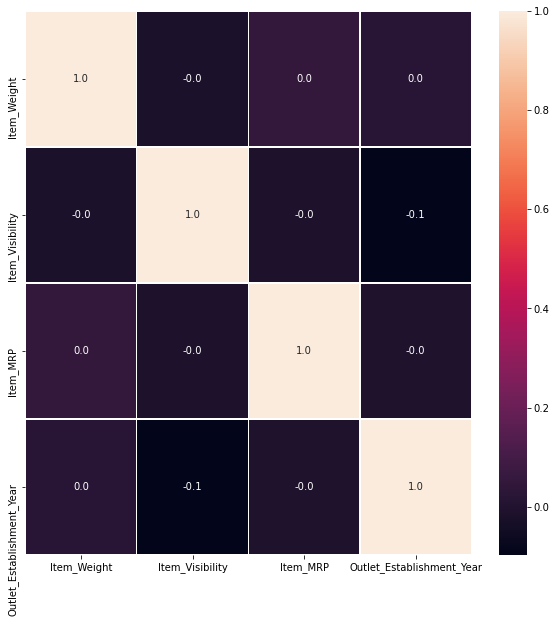

In [104]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(testc.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [105]:
trainc.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [106]:
testc.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [107]:
trainc.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [108]:
testc.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [109]:
#filling numeric no
s = (trainc.dtypes == 'float64')
object_cols = list(s[s].index)
print(object_cols)
for col in object_cols:
    trainc[col] = trainc[col].fillna(trainc[col].mean())
trainc.isna().sum()

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [110]:
#filling numeric no
s = (testc.dtypes == 'float64')
object_cols = list(s[s].index)
print(object_cols)
for col in object_cols:
    testc[col] = testc[col].fillna(testc[col].mean())
testc.isna().sum()

['Item_Weight', 'Item_Visibility', 'Item_MRP']


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [111]:
print(trainc['Outlet_Size'].mode())
print(testc['Outlet_Size'].mode())

0    Medium
dtype: object
0    Medium
dtype: object


In [112]:
#filling categorical var
trainc['Outlet_Size']=trainc['Outlet_Size'].apply(lambda x: str(x).replace('nan','Medium'))
testc['Outlet_Size']=testc['Outlet_Size'].apply(lambda x: str(x).replace('nan','Medium'))

In [113]:
print(trainc.isna().sum())
print(testc.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [114]:
#encodeing all categorical var
s = (trainc.dtypes == 'object')


object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    trainc[col] = label_encoder.fit_transform(trainc[col])

Categorical variables:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [115]:
#encodeing all categorical var
s = (testc.dtypes == 'object')


object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    testc[col] = label_encoder.fit_transform(testc[col])

Categorical variables:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [116]:
trainc

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [117]:
testc

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,1,1,1


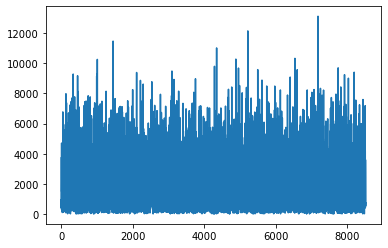

In [118]:
plt.plot(trainc['Item_Outlet_Sales'])

In [119]:
X_train=trainc.iloc[:,:-1].values
y_train=trainc.iloc[:,-1].values
X_test=testc.values

In [120]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [121]:
X_train.shape

(8523, 11)

In [122]:
X_test.shape

(5681, 11)

In [123]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)
# Predicting the Test set results
y_pred1 = regressor1.predict(X_test)
ev1=regressor1.predict(X_train)

In [124]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'linear')
regressor2.fit(X_train, y_train)
# Predicting the Test set results
y_pred2= regressor2.predict(X_test)
ev2=regressor2.predict(X_train)

In [125]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor3 = SVR(kernel = 'rbf')
regressor3.fit(X_train, y_train)
# Predicting the Test set results
y_pred3 = regressor3.predict(X_test)
ev3=regressor3.predict(X_train)

In [126]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor4 = DecisionTreeRegressor(random_state = 0)
regressor4.fit(X_train, y_train)
# Predicting the Test set results
y_pred4 = regressor4.predict(X_test)
ev4=regressor4.predict(X_train)

In [127]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor5 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor5.fit(X_train, y_train)
# Predicting the Test set results
y_pred5 = regressor5.predict(X_test)
ev5=regressor5.predict(X_train)

In [129]:
from sklearn.metrics import mean_squared_error
import math
#classification report
#accuracy
from sklearn import metrics
print("model source:",regressor1.score(X_train,y_train))
print("model source:",regressor2.score(X_train,y_train))
print("model source:",regressor3.score(X_train,y_train))
print("model source:",regressor4.score(X_train,y_train))
print("model source:",regressor5.score(X_train,y_train))

model source: 0.5102762710854738
model source: 0.4750710365670887
model source: 0.0714909068409364
model source: 1.0
model source: 0.9165123823841591


In [130]:
sf=pd.DataFrame(y_pred5,columns=['Item_Outlet_Sales'])
df = pd.concat([test.Item_Identifier,test.Outlet_Identifier,sf['Item_Outlet_Sales']], axis=1)

In [131]:
df

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1658.64096
1,FDW14,OUT017,1624.41884
2,NCN55,OUT010,726.58754
3,FDQ58,OUT017,2646.82132
4,FDY38,OUT027,6446.54192
...,...,...,...
5676,FDB58,OUT046,2072.90172
5677,FDD47,OUT018,2425.30966
5678,NCO17,OUT045,1728.48338
5679,FDJ26,OUT017,4415.18612


In [132]:
df.to_csv("submission.csv",index=False)